# Introduction

Plotting routine for various metrics related to HHL and varying problem size.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
saveFig      = False

# Timing data

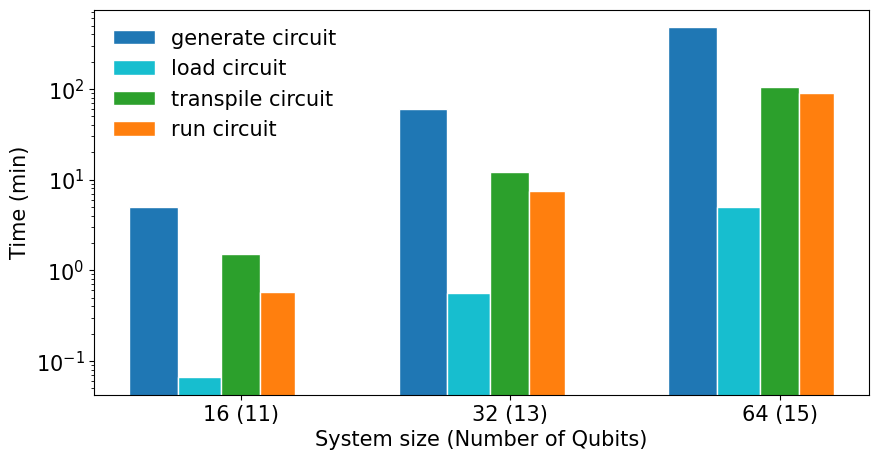

In [3]:
problem_size        = 2**np.array([4, 5, 6])
num_qubits          = np.array([11, 13, 15])
time_circ           = np.array([5, 60, 480])
time_circ_load      = np.array([0.066, 0.566, 5])
time_transpile      = np.array([1.5, 12, 105])
time_run            = np.array([0.58, 7.5, 90])
size_circ           = np.array([58, 470, 4000])

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1,1,figsize=(10,5))

tskip = 1
x = problem_size
width = 0.1*x
ax.bar(x-2*width, time_circ    , width=width, color='tab:blue'  , ec="w", label='generate circuit')
ax.bar(x-width, time_circ_load    , width=width, color='tab:cyan'  , ec="w", label='load circuit')
ax.bar(x      , time_transpile, width=width, color='tab:green' , ec="w", label='transpile circuit')
ax.bar(x+width, time_run  , width=width, color='tab:orange', ec="w", label='run circuit')

ax.set_xscale('log', base=2)
ax.set_xticks(problem_size)
xtick_labels = [f"{ps} ({nq})" for ps, nq in zip(problem_size, num_qubits)]
ax.set_xticklabels(xtick_labels, rotation=0)  # Adjust rotation as needed
ax.set_yscale('log', base=10)
ax.set_xlabel('System size (Number of Qubits)')
ax.set_ylabel('Time (min)')
ax.legend(loc='best', frameon=False);
if saveFig: plt.savefig(f'Figs/time_scale.png', bbox_inches='tight', dpi=600)

# Fidelity data

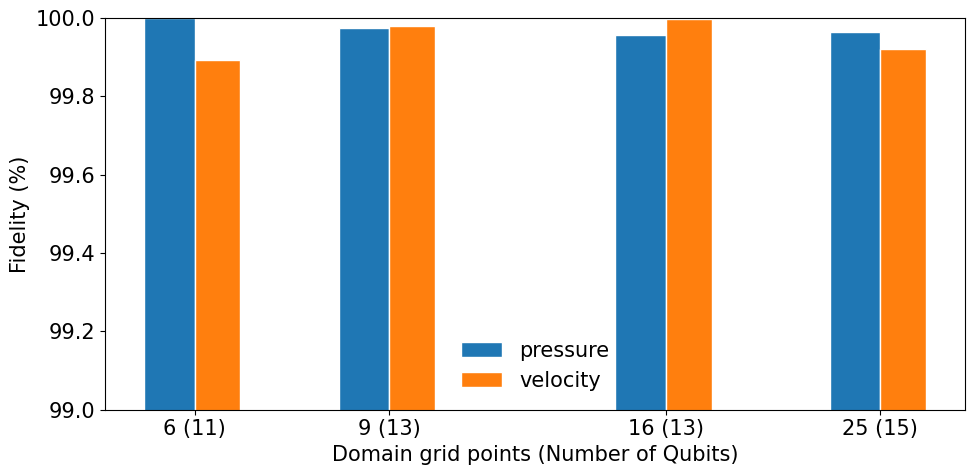

In [4]:
problem_size        = np.array([6, 9, 16, 25])
num_qubits          = np.array([11, 13, 13, 15])
fidelity_pressure   = np.array([0.99999, 0.99974, 0.99956, 0.99964])*100
fidelity_velocity   = np.array([0.99894, 0.99979, 0.99998, 0.9992])*100

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1,1,figsize=(10,5))

tskip = 1
x = problem_size
width = 0.1*x
ax.bar(x-0.5*width, fidelity_pressure  , width=width, color='tab:blue'  , ec="w", label='pressure')
ax.bar(x+0.5*width, fidelity_velocity  , width=width, color='tab:orange', ec="w", label='velocity')

ax.set_xscale('log', base=2)
ax.set_xticks(problem_size)
# Concatenate problem_size with num_qubits for xticks labels
xtick_labels = [f"{ps} ({nq})" for ps, nq in zip(problem_size, num_qubits)]
ax.set_xticklabels(xtick_labels, rotation=0)  # Adjust rotation as needed

ax.set_ylim([99, 100])

ax.set_xlabel('Domain grid points (Number of Qubits)')
ax.set_ylabel('Fidelity (%)')
ax.legend(loc='best', frameon=False)
plt.tight_layout()
if saveFig: plt.savefig(f'Figs/fidelity_scale.png', bbox_inches='tight', dpi=600)

# Condition number

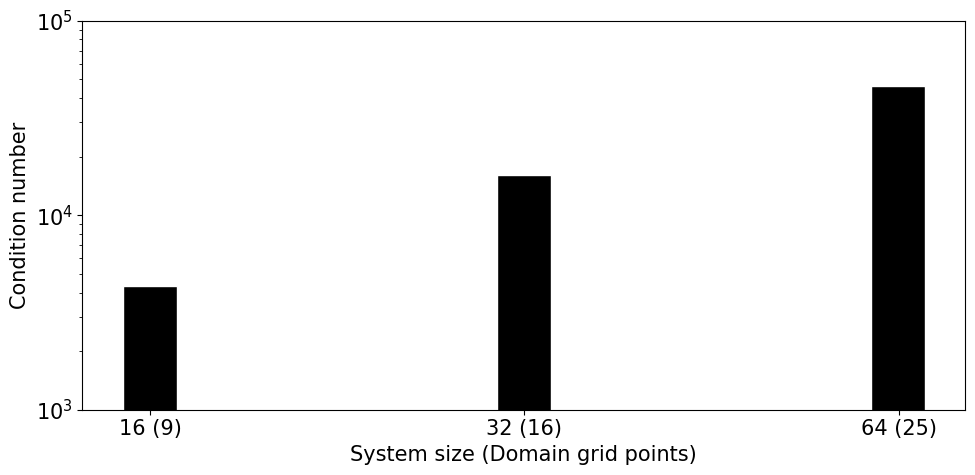

In [5]:
grid_size        = np.array([9, 16, 25])
problem_size        = 2**np.array([4, 5, 6])
condnum_pressure   = np.array([43.128642942315544, 160.22504179133432, 459.6699253198846])*100
condnum_velocity   = np.array([43.128642942315615, 160.22504179133387, 459.6699253198838])*100

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1,1,figsize=(10,5))

tskip = 1
x = problem_size
width = 0.1*x
ax.bar(x+0.0*width, condnum_velocity  , width=width, color='k', ec="w", label='velocity')

ax.set_xscale('log', base=2)
ax.set_xticks(problem_size)
# Concatenate problem_size with num_qubits for xticks labels
xtick_labels = [f"{ps} ({nq})" for ps, nq in zip(problem_size, grid_size)]
ax.set_xticklabels(xtick_labels, rotation=0)  # Adjust rotation as needed

ax.set_ylim([1e3, 1e5])
ax.set_yscale('log', base=10)

ax.set_xlabel('System size (Domain grid points)')
ax.set_ylabel('Condition number')
# ax.legend(loc='best', frameon=False)
plt.tight_layout()
if saveFig: plt.savefig(f'Figs/conditionnum_scale.png', bbox_inches='tight', dpi=600)